# Evaluating Majority Voting Approach

## Operations

### Read standard concepts

In [1]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
operationsDf = athenaDf[athenaDf.invalid_reason.isna() & (athenaDf.standard_concept == 'S') & (athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Procedure') & (athenaDf.concept_class_id == 'Procedure')]
operationsDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254913,42534812,Ultrasonography of calf of right lower leg,Procedure,SNOMED,Procedure,S,1001000087107,20180131,20991231,NaN
2254926,42534815,Right fluoroscopic retrograde pyelography,Procedure,SNOMED,Procedure,S,101000087107,20180131,20991231,NaN
2254929,37108565,Ultrasonography of left elbow,Procedure,SNOMED,Procedure,S,1011000087109,20170731,20991231,NaN
2254947,37108566,Ultrasonography of right elbow,Procedure,SNOMED,Procedure,S,1021000087101,20170731,20991231,NaN
2254970,37117086,Ultrasonography of left foot,Procedure,SNOMED,Procedure,S,1031000087104,20170731,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271637,3663244,Esophagogastroduodenoscopy gastric outlet redu...,Procedure,SNOMED,Procedure,S,870424001,20200731,20991231,NaN
3271638,3663245,Quantitative electroencephalogram,Procedure,SNOMED,Procedure,S,870425000,20200731,20991231,NaN
3271639,3663246,Angioplasty using paclitaxel coated balloon ca...,Procedure,SNOMED,Procedure,S,870426004,20200731,20991231,NaN
3271660,3663267,Sequential anastomosis of free right internal ...,Procedure,SNOMED,Procedure,S,871498004,20200731,20991231,NaN


### Read operations file

In [2]:
import pandas as pd

sourceOperationsDf = pd.read_csv('data/20004_operation.csv', dtype=str)
sourceOperationsDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20004,scan / x-ray,1603,NaN,NaN,332,NaN,0.654131293296814,UNCHECKED,NaN,0,4178367,VALUE,NaN,NaN,1603436039043
1,20004,exercise ecg,1599,NaN,NaN,150,NaN,1.0,APPROVED,NaN,0,4261794,VALUE,NaN,NaN,1603436039045
2,20004,liver surgery,1450,NaN,NaN,435,NaN,0.7727025747299194,APPROVED,NaN,0,4171687,VALUE,NaN,NaN,1603436039047
3,20004,lymph node surgery,1537,NaN,NaN,1537,NaN,0.6767706274986267,APPROVED,NaN,0,4194197,VALUE,NaN,NaN,1603436039049
4,20004,bone marrow biopsy,1615,NaN,NaN,116,NaN,1.0,APPROVED,NaN,0,4120443,VALUE,NaN,NaN,1603436039051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,20004,pancreatic transplant,1457,NaN,NaN,7,NaN,1.0,APPROVED,NaN,0,4266668,VALUE,NaN,NaN,1603436039260
250,20004,amputation of toe,1442,NaN,NaN,506,NaN,1.0,APPROVED,NaN,0,4159766,VALUE,NaN,NaN,1603436039260
251,20004,amputation of leg,1440,NaN,NaN,240,NaN,1.0,APPROVED,NaN,0,4219032,VALUE,NaN,NaN,1603436039261
252,20004,endometrial ablation,1360,NaN,NaN,2851,NaN,1.0,APPROVED,NaN,0,4141940,VALUE,NaN,NaN,1603436039262


### Read mapped operations file

In [5]:
import pandas as pd

mappedOperationsDf = pd.read_csv('data/20004_operation_mapped_majority_voting.csv')
mappedOperationsDf

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
0,0,scan / x-ray,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,Radiographic imaging procedure,Low
1,1,scan / x-ray,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,Scapula X-ray,Low
2,2,scan / x-ray,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,Dual energy X-ray absorptiometry scan of wrist,Low
3,3,exercise ecg,Electrocardiogram with exercise test,Exercise challenge,NaN,Electrocardiogram with exercise test,Low
4,4,exercise ecg,Electrocardiogram with exercise test,Exercise challenge,NaN,Exercise challenge,Low
...,...,...,...,...,...,...,...
660,660,amputation of leg,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of leg,Medium
661,661,amputation of leg,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of lower limb,Low
662,662,endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,High
663,663,heart transplant,Transplantation of heart,Heart transplant,Heart transplant,Heart transplant,Medium


### Analyse mapped operations file

In [6]:
mappedOperationsDf.confidence.value_counts()

Low       600
Medium     36
High       29
Name: confidence, dtype: int64

In [7]:
mappedOperationsDf[mappedOperationsDf.confidence.isin(['Medium', 'High'])]

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
21,21,ecg/electrocardiogram,Electrocardiographic procedure,ECG - electrocardiogram (& general),ECG - electrocardiogram (& general),ECG - electrocardiogram (& general),Medium
32,32,achilles tendon repair,Repair of tendo achilles,Repair of tendo achilles,Tendon repair: [NOS] or [Achilles],Repair of tendo achilles,Medium
43,43,barium enema,Barium enema,Barium enema,Barium enema,Barium enema,High
44,44,liver biopsy,Biopsy of liver,Biopsy of liver,Biopsy of liver,Biopsy of liver,High
45,45,salpingectomy,Fallopian tube excision,Salpingectomy,Salpingectomy,Salpingectomy,Medium
...,...,...,...,...,...,...,...
657,657,pancreatic transplant,Transplantation of pancreas,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant,Medium
659,659,amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe,High
660,660,amputation of leg,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of leg,Medium
662,662,endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,High


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

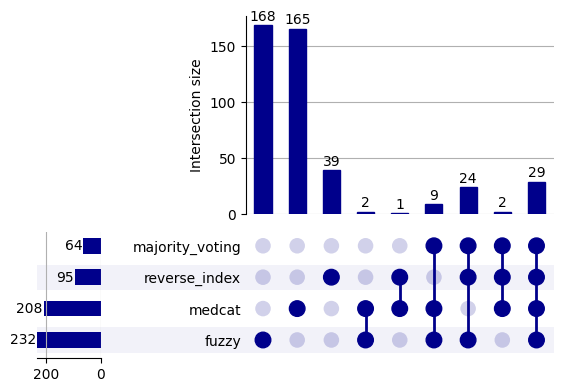

In [8]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedOperationsDf.medcatConcept)
mappedIdsFuzzy = set(mappedOperationsDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedOperationsDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedOperationsDf[mappedOperationsDf.confidence.isin(['Medium', 'High'])].majorityVoting)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Create final dataframe

In [9]:
mappedOperationsMedcatDf = mappedOperationsDf[mappedOperationsDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
mappedOperationsMedcatDf.reset_index(drop = True, inplace = True)
mappedOperationsMedcatDf.columns = mappedOperationsMedcatDf.columns.droplevel(1)
mappedOperationsMedcatDf.medcatConcept = mappedOperationsMedcatDf.medcatConcept.apply(lambda x: x[0])
mappedOperationsMedcatDf.searchPhrase = mappedOperationsMedcatDf.searchPhrase.apply(lambda x: str(x[0]))
mappedOperationsFuzzyDf = mappedOperationsDf[mappedOperationsDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
mappedOperationsFuzzyDf.reset_index(drop = True, inplace = True)
mappedOperationsFuzzyDf.columns = mappedOperationsFuzzyDf.columns.droplevel(1)
mappedOperationsFuzzyDf.fuzzyConcept = mappedOperationsFuzzyDf.fuzzyConcept.apply(lambda x: x[0])
mappedOperationsFuzzyDf.searchPhrase = mappedOperationsFuzzyDf.searchPhrase.apply(lambda x: str(x[0]))
mappedOperationsReverseIndexDf = mappedOperationsDf[mappedOperationsDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
mappedOperationsReverseIndexDf.reset_index(drop = True, inplace = True)
mappedOperationsReverseIndexDf.columns = mappedOperationsReverseIndexDf.columns.droplevel(1)
mappedOperationsReverseIndexDf.reverseIndexConcept = mappedOperationsReverseIndexDf.reverseIndexConcept.apply(lambda x: x[0])
mappedOperationsReverseIndexDf.searchPhrase = mappedOperationsReverseIndexDf.searchPhrase.apply(lambda x: str(x[0]))
mappedOperationsMajorityVotingDf = mappedOperationsDf[mappedOperationsDf.majorityVoting.notna() & mappedOperationsDf.confidence.isin(['Medium', 'High'])].groupby(['searchPhrase'])['searchPhrase', 'majorityVoting'].agg(['unique'])
mappedOperationsMajorityVotingDf.reset_index(drop = True, inplace = True)
mappedOperationsMajorityVotingDf.columns = mappedOperationsMajorityVotingDf.columns.droplevel(1)
mappedOperationsMajorityVotingDf.majorityVoting = mappedOperationsMajorityVotingDf.majorityVoting.apply(lambda x: x[0])
mappedOperationsMajorityVotingDf.searchPhrase = mappedOperationsMajorityVotingDf.searchPhrase.apply(lambda x: str(x[0]))

/tmp/ipykernel_3521955/2921637815.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsMedcatDf = mappedOperationsDf[mappedOperationsDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
/tmp/ipykernel_3521955/2921637815.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsFuzzyDf = mappedOperationsDf[mappedOperationsDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
/tmp/ipykernel_3521955/2921637815.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsReverseIndexDf = mappedOperationsDf[mappedOperationsDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['uniq

In [10]:
mappedOperationsCuratedDf = sourceOperationsDf\
    .merge(operationsDf, how='left', left_on='conceptId', right_on='concept_id')[['sourceName', 'sourceValueCode', 'concept_name']]
mappedOperationsCuratedDf = mappedOperationsCuratedDf.rename(columns={'concept_name': 'curatedConcept'})
mappedOperationsCuratedDf

,sourceName,sourceValueCode,curatedConcept
0,scan / x-ray,1603,Radiographic imaging procedure
1,exercise ecg,1599,Electrocardiogram with exercise test
2,liver surgery,1450,Operation on liver
3,lymph node surgery,1537,Operation on lymph node
4,bone marrow biopsy,1615,Bone marrow sampling
...,...,...,...
249,pancreatic transplant,1457,Transplantation of pancreas
250,amputation of toe,1442,Amputation of toe
251,amputation of leg,1440,Amputation of lower limb
252,endometrial ablation,1360,Endometrial ablation


In [11]:
# pd.concat([mappedOperationsCuratedDf, mappedOperationsFuzzyDf], keys=['sourceValueCode', 'id'])
mappedOperationsFinalDf = mappedOperationsCuratedDf\
    .merge(mappedOperationsMedcatDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
        .merge(mappedOperationsFuzzyDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
            .merge(mappedOperationsReverseIndexDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
                .merge(mappedOperationsMajorityVotingDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])
mappedOperationsFinalDf

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,scan / x-ray,1603,Radiographic imaging procedure,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,NaN
1,exercise ecg,1599,Electrocardiogram with exercise test,Electrocardiogram with exercise test,Exercise challenge,NaN,NaN
2,liver surgery,1450,Operation on liver,Operation on liver,Laser surgery,NaN,NaN
3,lymph node surgery,1537,Operation on lymph node,Structure of lymph node,Procedure on lymph node,NaN,NaN
4,bone marrow biopsy,1615,Bone marrow sampling,Bone marrow sampling,Biopsy of bone,Bone marrow biopsy (& non-surgical),NaN
...,...,...,...,...,...,...,...
249,pancreatic transplant,1457,Transplantation of pancreas,Transplantation of pancreas,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant
250,amputation of toe,1442,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe
251,amputation of leg,1440,Amputation of lower limb,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of leg
252,endometrial ablation,1360,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation


### Plot the output of all the mapping strategies

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

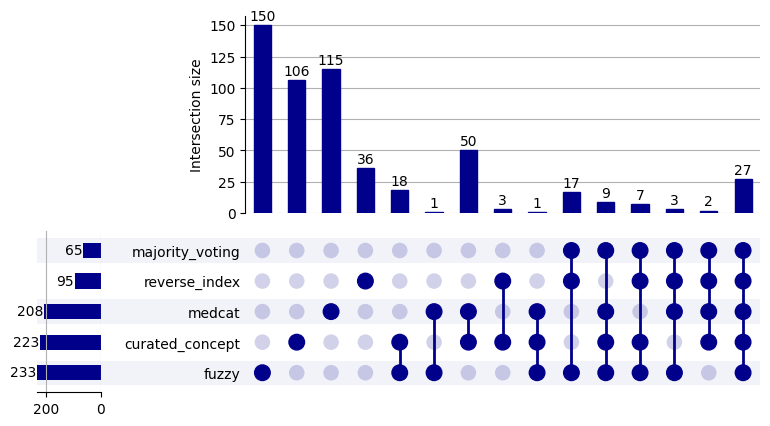

In [12]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedOperationsFinalDf.medcatConcept)
mappedIdsFuzzy = set(mappedOperationsFinalDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedOperationsFinalDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedOperationsFinalDf.majorityVoting)
mappedIdsCurated = set(mappedOperationsFinalDf.curatedConcept)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        , 'curated_concept': mappedIdsCurated
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Calculate matching and not matching percentages

In [13]:
matchingMedcatOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.medcatConcept].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
matchingFuzzyOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.fuzzyConcept].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
matchingReverseIndexOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.reverseIndexConcept].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
matchingmajorityVotingOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.majorityVoting].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
notMatchingMedcatOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.medcatConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.medcatConcept)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
notMatchingFuzzyOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.fuzzyConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.fuzzyConcept)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
notMatchingReverseIndexOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.reverseIndexConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.reverseIndexConcept)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
notMatchingmajorityVotingOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.majorityVoting.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.majorityVoting)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
totalMedcatOperationsPercentage = round(mappedOperationsFinalDf.medcatConcept.notna().sum()/mappedOperationsFinalDf.shape[0] * 100, 2)
totalFuzzyOperationsPercentage = round(mappedOperationsFinalDf.fuzzyConcept.notna().sum()/mappedOperationsFinalDf.shape[0] * 100, 2)
totalReverseIndexOperationsPercentage = round(mappedOperationsFinalDf.reverseIndexConcept.notna().sum()/mappedOperationsFinalDf.shape[0] * 100, 2)
totalMajorityVotingOperationsPercentage = round(mappedOperationsFinalDf.majorityVoting.notna().sum()/mappedOperationsFinalDf.shape[0] * 100, 2)

### Plot total mapping percentage

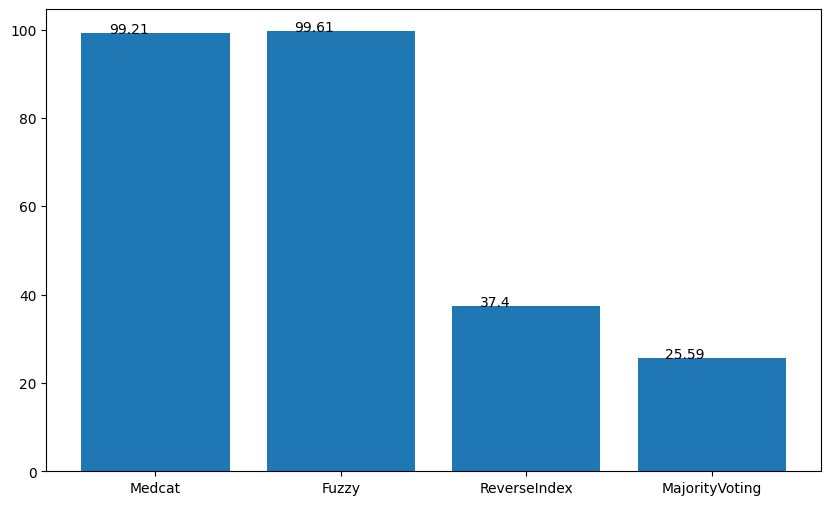

In [14]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [totalMedcatOperationsPercentage, totalFuzzyOperationsPercentage, totalReverseIndexOperationsPercentage, totalMajorityVotingOperationsPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

### Plot matching percentages

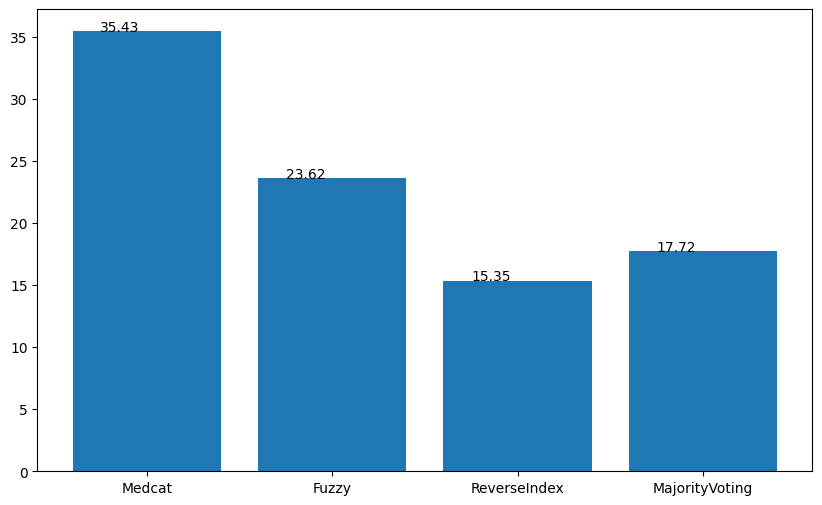

In [15]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [matchingMedcatOperationsPercentage, matchingFuzzyOperationsPercentage, matchingReverseIndexOperationsPercentage, matchingmajorityVotingOperationsPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

### Plot not matching percentages

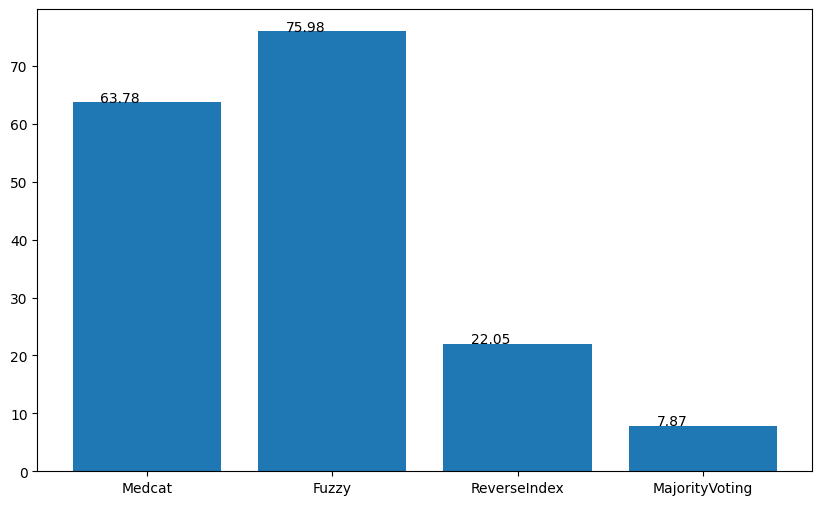

In [16]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [notMatchingMedcatOperationsPercentage, notMatchingFuzzyOperationsPercentage, notMatchingReverseIndexOperationsPercentage, notMatchingmajorityVotingOperationsPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

## Illness

### Read standard concepts

In [17]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
illnessDf = athenaDf[athenaDf.invalid_reason.isna() & (athenaDf.standard_concept == 'S') & (athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Condition') & (athenaDf.concept_class_id == 'Clinical Finding')]
illnessDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254914,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN
2254915,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN
2254916,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN
2254917,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN
2254918,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271658,3663265,Sprain of ulnar carpal complex ligament,Condition,SNOMED,Clinical Finding,S,870768000,20200731,20991231,NaN
3271659,3663266,Presenting part of fetus not engaged,Condition,SNOMED,Clinical Finding,S,871478009,20200731,20991231,NaN
3271669,3663278,Acquired abnormality of atrioventricular (not ...,Condition,SNOMED,Clinical Finding,S,874782009,20200731,20991231,NaN
3271672,3663281,Lower respiratory infection caused by SARS-CoV-2,Condition,SNOMED,Clinical Finding,S,880529761000119102,20200731,20991231,NaN


### Read illness file

In [18]:
import pandas as pd

sourceIllnessDf = pd.read_csv('data/20002_non-cancer_illness.csv', dtype=str)
sourceIllnessDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20002,diabetes,1220,diabetes,NaN,23996,NaN,0.8904300332069397,APPROVED,Vaclav,1604396402676,201820,VALUE,NaN,Vaclav,1604396395977
1,20002,fracture hand,1638,fracture hand,NaN,441,NaN,0.8478937149047852,APPROVED,Vaclav,1604397104088,4071876,VALUE,NaN,<auto>,1604359804705
2,20002,uterine problem,1552,uterine problem,NaN,91,NaN,0.7672346234321594,APPROVED,Vaclav,1604404677075,4129177,VALUE,NaN,Vaclav,1604404675001
3,20002,asbestosis,1120,asbestosis,NaN,208,NaN,1.0,APPROVED,Vaclav,1604361691699,256450,VALUE,NaN,<auto>,1604359804727
4,20002,haemophilia,1328,haemophilia,NaN,78,NaN,1.0,APPROVED,Vaclav,1604361697782,4236898,VALUE,NaN,<auto>,1604359804809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,20002,endometriosis,1402,endometriosis,NaN,4533,NaN,1.0,APPROVED,Vaclav,1604395600509,433527,VALUE,NaN,<auto>,1604359879127
442,20002,bell's palsy/facial nerve palsy,1250,bell's palsy/facial nerve palsy,NaN,588,NaN,0.6373665928840637,APPROVED,Vaclav,1604417223795,374923,VALUE,NaN,<auto>,1604359879335
443,20002,female infertility,1403,female infertility,NaN,674,NaN,1.0,APPROVED,Vaclav,1604395603304,201909,VALUE,NaN,<auto>,1604359879718
444,20002,male infertility,1404,male infertility,NaN,38,NaN,1.0,APPROVED,Vaclav,1604395604447,198197,VALUE,NaN,<auto>,1604359880370


### Read mapped illness file

In [19]:
import pandas as pd

# baseDir = '/superbugai-data/yash/temp/'
# mappedIllnessDf = pd.read_csv(baseDir + '20002_non-cancer_illness_mapped.csv')
mappedIllnessDf = pd.read_csv('data/20002_non-cancer_illness_mapped_majority_voting.csv')
mappedIllnessDf

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
0,0,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Diabetes mellitus,Low
1,1,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Prediabetes,Low
2,2,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Diabetic neuropathy &/or diabetic polyneuropathy,Low
3,3,fracture hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,High
4,4,uterine problem,Uterine structure,Uterine prolapse,Uterine contractions problem,Uterine structure,Low
...,...,...,...,...,...,...,...
1135,1135,male infertility,Male infertility,Male infertility,Investigations for male infertility,Male infertility,Medium
1136,1136,male infertility,Male infertility,Male infertility,Investigations for male infertility,Investigations for male infertility,Low
1137,1137,other renal/kidney problem,Kidney structure,Peer problem in remission,NaN,Kidney structure,Low
1138,1138,other renal/kidney problem,Kidney structure,Peer problem in remission,NaN,Peer problem in remission,Low


### Analyse mapped illness file

In [20]:
mappedIllnessDf.confidence.value_counts()

Low       947
Medium    191
High        2
Name: confidence, dtype: int64

In [22]:
len(mappedIllnessDf.searchPhrase.unique())

444

In [23]:
mappedIllnessDf[mappedIllnessDf.confidence.isin(['Medium', 'High'])]

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
3,3,fracture hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,High
7,7,asbestosis,Asbestosis,Asbestosis,Asbestosis,Asbestosis,High
8,8,haemophilia,NaN,Hemophilia,NaN,NaN,Medium
10,10,rheumatic fever,Rheumatic fever,Rheumatic fever,NaN,Rheumatic fever,Medium
12,12,diabetes insipidus,Diabetes insipidus,Diabetes insipidus,Management of diabetes insipidus,Diabetes insipidus,Medium
...,...,...,...,...,...,...,...
1121,1121,pneumonia,Pneumonia,Pneumonia,Atypical pneumonia screening test,Pneumonia,Medium
1123,1123,peptic ulcer,Peptic ulcer,Peptic ulcer,Perforated peptic ulcer closure,Peptic ulcer,Medium
1128,1128,endometriosis,Endometriosis,Endometriosis,Laparoscopic laser destruction of endometriosis,Endometriosis,Medium
1133,1133,female infertility,Female infertility,Female infertility,Female infertility therapy,Female infertility,Medium


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

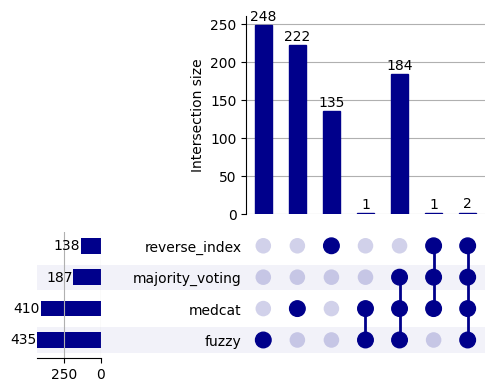

In [24]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedIllnessDf.medcatConcept)
mappedIdsFuzzy = set(mappedIllnessDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedIllnessDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedIllnessDf[mappedIllnessDf.confidence.isin(['Medium', 'High'])].majorityVoting)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Create final dataframe

In [25]:
mappedIllnessMedcatDf = mappedIllnessDf[mappedIllnessDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
mappedIllnessMedcatDf.reset_index(drop = True, inplace = True)
mappedIllnessMedcatDf.columns = mappedIllnessMedcatDf.columns.droplevel(1)
mappedIllnessMedcatDf.medcatConcept = mappedIllnessMedcatDf.medcatConcept.apply(lambda x: x[0])
mappedIllnessMedcatDf.searchPhrase = mappedIllnessMedcatDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessFuzzyDf = mappedIllnessDf[mappedIllnessDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
mappedIllnessFuzzyDf.reset_index(drop = True, inplace = True)
mappedIllnessFuzzyDf.columns = mappedIllnessFuzzyDf.columns.droplevel(1)
mappedIllnessFuzzyDf.fuzzyConcept = mappedIllnessFuzzyDf.fuzzyConcept.apply(lambda x: x[0])
mappedIllnessFuzzyDf.searchPhrase = mappedIllnessFuzzyDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessReverseIndexDf = mappedIllnessDf[mappedIllnessDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
mappedIllnessReverseIndexDf.reset_index(drop = True, inplace = True)
mappedIllnessReverseIndexDf.columns = mappedIllnessReverseIndexDf.columns.droplevel(1)
mappedIllnessReverseIndexDf.reverseIndexConcept = mappedIllnessReverseIndexDf.reverseIndexConcept.apply(lambda x: x[0])
mappedIllnessReverseIndexDf.searchPhrase = mappedIllnessReverseIndexDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessMajorityVotingDf = mappedIllnessDf[mappedIllnessDf.majorityVoting.notna() & mappedIllnessDf.confidence.isin(['Medium', 'High'])].groupby(['searchPhrase'])['searchPhrase', 'majorityVoting'].agg(['unique'])
mappedIllnessMajorityVotingDf.reset_index(drop = True, inplace = True)
mappedIllnessMajorityVotingDf.columns = mappedIllnessMajorityVotingDf.columns.droplevel(1)
mappedIllnessMajorityVotingDf.majorityVoting = mappedIllnessMajorityVotingDf.majorityVoting.apply(lambda x: x[0])
mappedIllnessMajorityVotingDf.searchPhrase = mappedIllnessMajorityVotingDf.searchPhrase.apply(lambda x: str(x[0]))

/tmp/ipykernel_3521955/2855382503.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessMedcatDf = mappedIllnessDf[mappedIllnessDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
/tmp/ipykernel_3521955/2855382503.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessFuzzyDf = mappedIllnessDf[mappedIllnessDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
/tmp/ipykernel_3521955/2855382503.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessReverseIndexDf = mappedIllnessDf[mappedIllnessDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
/tmp/ipykernel_352195

In [26]:
mappedIllnessCuratedDf = sourceIllnessDf\
    .merge(illnessDf, how='left', left_on='conceptId', right_on='concept_id')[['sourceName', 'sourceValueCode', 'concept_name']]
mappedIllnessCuratedDf = mappedIllnessCuratedDf.rename(columns={'concept_name': 'curatedConcept'})
mappedIllnessCuratedDf

,sourceName,sourceValueCode,curatedConcept
0,diabetes,1220,Diabetes mellitus
1,fracture hand,1638,Fracture of hand
2,uterine problem,1552,Uterus problem
3,asbestosis,1120,Asbestosis
4,haemophilia,1328,Hemophilia
...,...,...,...
441,endometriosis,1402,Endometriosis (clinical)
442,bell's palsy/facial nerve palsy,1250,Bell's palsy
443,female infertility,1403,Female infertility
444,male infertility,1404,Male infertility


In [27]:
# pd.concat([mappedOperationsCuratedDf, mappedOperationsFuzzyDf], keys=['sourceValueCode', 'id'])
mappedIllnessFinalDf = mappedIllnessCuratedDf\
    .merge(mappedIllnessMedcatDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
        .merge(mappedIllnessFuzzyDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
            .merge(mappedIllnessReverseIndexDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
                .merge(mappedIllnessMajorityVotingDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])
mappedIllnessFinalDf

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,diabetes,1220,Diabetes mellitus,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,NaN
1,fracture hand,1638,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand
2,uterine problem,1552,Uterus problem,Uterine structure,Uterine prolapse,Uterine contractions problem,NaN
3,asbestosis,1120,Asbestosis,Asbestosis,Asbestosis,Asbestosis,Asbestosis
4,haemophilia,1328,Hemophilia,NaN,Hemophilia,NaN,NaN
...,...,...,...,...,...,...,...
441,endometriosis,1402,Endometriosis (clinical),Endometriosis,Endometriosis,Laparoscopic laser destruction of endometriosis,Endometriosis
442,bell's palsy/facial nerve palsy,1250,Bell's palsy,Facial palsy,Bell's palsy &/or facial palsy,NaN,NaN
443,female infertility,1403,Female infertility,Female infertility,Female infertility,Female infertility therapy,Female infertility
444,male infertility,1404,Male infertility,Male infertility,Male infertility,Investigations for male infertility,Male infertility


### Plot the output of all the mapping strategies

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

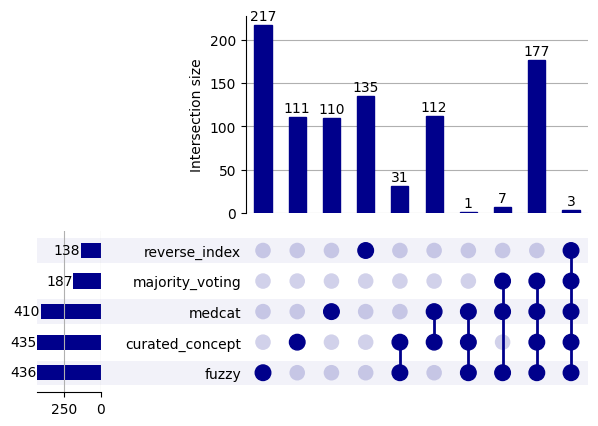

In [28]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedIllnessFinalDf.medcatConcept)
mappedIdsFuzzy = set(mappedIllnessFinalDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedIllnessFinalDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedIllnessFinalDf.majorityVoting)
mappedIdsCurated = set(mappedIllnessFinalDf.curatedConcept)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        , 'curated_concept': mappedIdsCurated
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Calculate matching and not matching percentages

In [31]:
matchingMedcatIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.medcatConcept].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
matchingFuzzyIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.fuzzyConcept].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
matchingReverseIndexIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.reverseIndexConcept].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
matchingmajorityVotingIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.majorityVoting].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
notMatchingMedcatIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.medcatConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.medcatConcept)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
notMatchingFuzzyIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.fuzzyConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.fuzzyConcept)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
notMatchingReverseIndexIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.reverseIndexConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.reverseIndexConcept)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
notMatchingmajorityVotingIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.majorityVoting.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.majorityVoting)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
totalMedcatIllnessPercentage = round(mappedIllnessFinalDf.medcatConcept.notna().sum()/mappedIllnessFinalDf.shape[0] * 100, 2)
totalFuzzyIllnessPercentage = round(mappedIllnessFinalDf.fuzzyConcept.notna().sum()/mappedIllnessFinalDf.shape[0] * 100, 2)
totalReverseIndexIllnessPercentage = round(mappedIllnessFinalDf.reverseIndexConcept.notna().sum()/mappedIllnessFinalDf.shape[0] * 100, 2)
totalMajorityVotingIllnessPercentage = round(mappedIllnessFinalDf.majorityVoting.notna().sum()/mappedIllnessFinalDf.shape[0] * 100, 2)

### Plot total mapping percentage

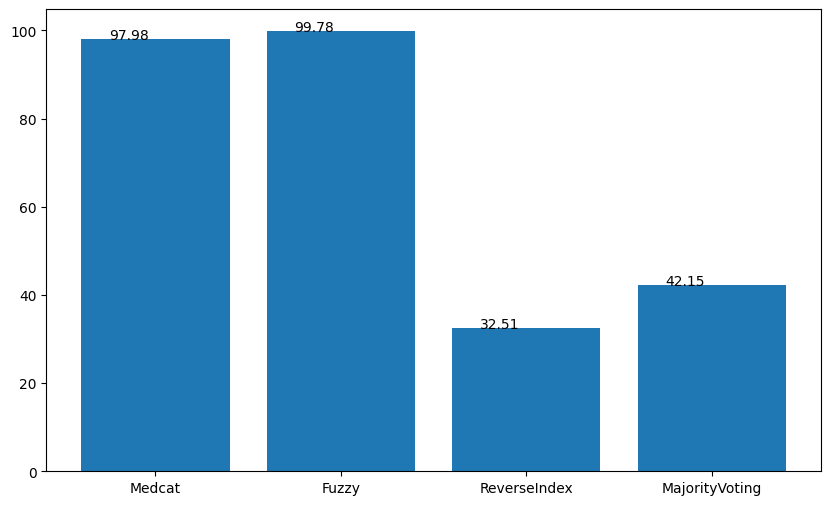

In [32]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [totalMedcatIllnessPercentage, totalFuzzyIllnessPercentage, totalReverseIndexIllnessPercentage, totalMajorityVotingIllnessPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

### Plot matching percentages

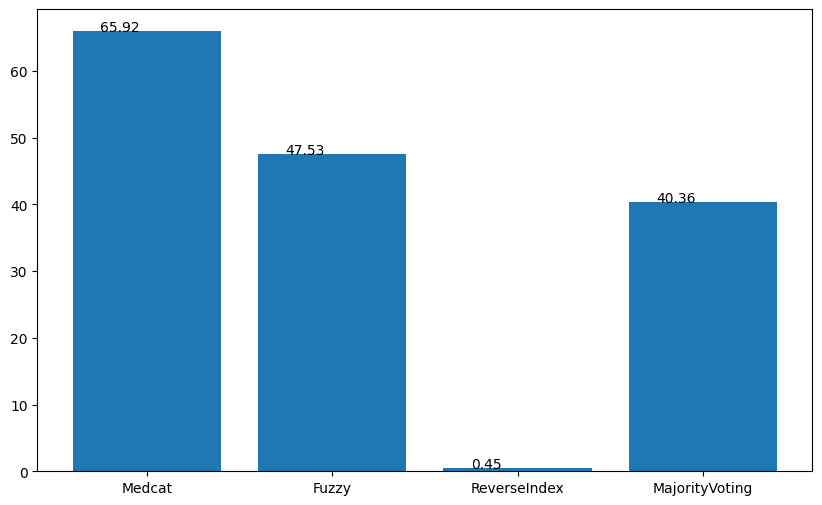

In [33]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [matchingMedcatIllnessPercentage, matchingFuzzyIllnessPercentage, matchingReverseIndexIllnessPercentage, matchingmajorityVotingIllnessPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

### Plot not matching percentages

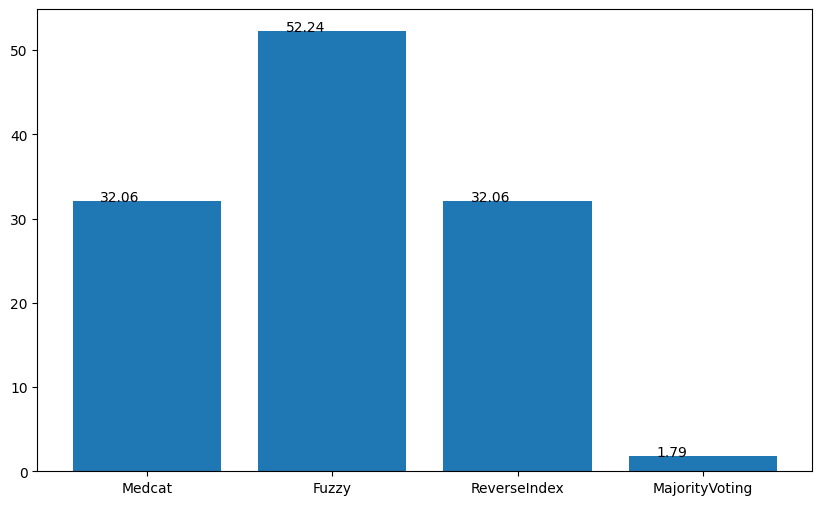

In [34]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [notMatchingMedcatIllnessPercentage, notMatchingFuzzyIllnessPercentage, notMatchingReverseIndexIllnessPercentage, notMatchingmajorityVotingIllnessPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

# Scratch space

In [24]:
mappedIllnessFinalDf[:20]

,sourceValueCode,sourceName,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,1220,diabetes,Diabetes mellitus,NaN,Skin ulcer due to type 2 diabetes mellitus,Diabetic neuropathy &/or diabetic polyneuropathy,NaN
1,1638,fracture hand,Fracture of hand,NaN,Open fracture of shaft of metacarpal bone of r...,Fracture of hand,NaN
2,1552,uterine problem,Uterus problem,Problem,Uterine scar from previous surgery in pregnanc...,Uterine contractions problem,NaN
3,1120,asbestosis,Asbestosis,Asbestosis,(Asbestosis) or (byssinosis) or (pleural plaqu...,Asbestosis,Asbestosis
4,1328,haemophilia,Hemophilia,Hemophilia,Hemophilia,NaN,Hemophilia
5,1479,rheumatic fever,Rheumatic fever,Rheumatic Fever,Rheumatic fever (& [acute]),Rheumatic fever,NaN
6,1521,diabetes insipidus,Diabetes insipidus,Diabetes Insipidus,Nephrogenic diabetes insipidus,Diabetes insipidus,NaN
7,1595,pleural plaques (not known asbestosis),Asbestos-induced pleural plaque,Pleural Plaque,Asbestosis,NaN,NaN
8,1522,grave's disease,Graves' disease,Disease,Disease,Graves' disease,Disease
9,1553,cervical problem,Uterine cervix problem,Problem,Cervical incompetence with antenatal problem,Cervical incompetence with antenatal problem,Cervical incompetence with antenatal problem


In [105]:
from whoosh.index import create_in
from whoosh import scoring
from whoosh.fields import *


matchingConcept = None

import os

if not os.path.isdir("/tmp/indexdir"):
    os.makedirs("/tmp/indexdir")

schema = Schema(concept=TEXT(stored=True))
ix = create_in("/tmp/indexdir", schema)

writer = ix.writer()
# standardConcepts = illnessDf[illnessDf.concept_name.apply(lambda x: 'diabetes' in str(x).lower())].concept_name
standardConcepts = illnessDf.concept_name
for standardConcept in standardConcepts:
    writer.add_document(concept=standardConcept)
writer.commit()

from whoosh.qparser import QueryParser
with ix.searcher(weighting=scoring.BM25F()) as searcher:
    query = QueryParser("concept", ix.schema).parse('diabetes')
    results = searcher.search(query)
    if len(results) > 0:
        matchingConcept = results[0]['concept']
matchingConcept

'Lipoatrophic diabetes'

In [120]:
illnessDf[illnessDf.concept_name.apply(lambda x: 'diabetes' in str(x).lower())].concept_name

2254959           Skin ulcer due to type 2 diabetes mellitus
2254961    Sensory neuropathy due to type 1 diabetes mell...
2254996    Proliferative retinopathy following surgery du...
2255019    Ischemia of retina due to type 1 diabetes mell...
2255020    Vitreous hemorrhage due to type 1 diabetes mel...
                                 ...                        
3263852    At high risk of ulcer of left foot due to diab...
3264356       Cystoid macular edema due to diabetes mellitus
3264390    Persistent macular edema due to diabetes mellitus
3264636    Centrally involved macular edema due to diabet...
3264637    Non centrally involved macular edema due to di...
Name: concept_name, Length: 527, dtype: object

In [104]:
from medcat.vocab import Vocab
from medcat.cdb import CDB
from medcat.meta_cat import MetaCAT

baseDir = '/superbugai-data/yash/temp/'

vocabPath=baseDir + 'trained_vocs/shared/vocab.dat'
# cdbPath=baseDir + 'Athena_SNOMED_Condition_Clinical_Finding_cdb.dat'
cdbPath=baseDir + 'cdb-medmen-v1_2.dat'
mc_statusPath=baseDir + 'trained_vocs/shared/mc_status'

# Load the vocab model you downloaded
vocab = Vocab.load(vocabPath)
# Load the cdb model you downloaded
cdb = CDB.load(cdbPath)
# Download the mc_status model from the models section below and unzip it
mc_status = MetaCAT.load(mc_statusPath)

from medcat.cat import CAT

cat = CAT(cdb=cdb, config=cdb.config, vocab=vocab, meta_cats=[mc_status])

entities = cat.get_entities('diabetes')['entities']
entities

{0: {'pretty_name': 'Diabetes',
  'cui': 'C0011847',
  'type_ids': ['T047'],
  'types': ['Disease or Syndrome'],
  'source_value': 'diabetes',
  'detected_name': 'diabetes',
  'acc': 0.8572384807348099,
  'context_similarity': 0.8572384807348099,
  'start': 0,
  'end': 8,
  'icd10': [],
  'ontologies': [],
  'snomed': [],
  'id': 0,
  'meta_anns': {'Status': {'value': 'Affirmed',
    'confidence': 0.9972877502441406,
    'name': 'Status'}}}}

In [1]:
# Install medcat
! pip uninstall -y medcat
! pip install medcat==1.5.0
try:
    from medcat.cat import CAT
except:
    print("WARNING: Runtime will restart automatically and please run other cells thereafter.")
    exit()

Found existing installation: medcat 1.5.0
Uninstalling medcat-1.5.0:
  Successfully uninstalled medcat-1.5.0
  Using cached medcat-1.5.0-py3-none-any.whl (141 kB)


/home/yram0006/phd/chapter_1/workspace/EHRQC/.venv/lib/python3.9/site-packages/medcat/cat.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
from medcat.cat import CAT

baseDir = '/superbugai-data/yash/temp/'
model_pack_path = baseDir + "mc_modelpack_snomed_int_16_mar_2022/mc_modelpack_snomed_int_16_mar_2022_25be3857ba34bdd5.zip"

# Load model pack and Create CAT - the main class from medcat used for concept annotation
# Create the full pipeline with models for meta-annotations
cat = CAT.load_model_pack(model_pack_path)

In [5]:
entities = cat.get_entities('diabetes')['entities']

In [6]:
entities

{0: {'pretty_name': 'Diabetes mellitus',
  'cui': '73211009',
  'type_ids': ['9090192'],
  'types': ['disorder'],
  'source_value': 'diabetes',
  'detected_name': 'diabetes',
  'acc': 0.7395656940759914,
  'context_similarity': 0.7395656940759914,
  'start': 0,
  'end': 8,
  'icd10': ['E14.9'],
  'ontologies': ['SNOMED-CT'],
  'snomed': [],
  'id': 0,
  'meta_anns': {'Status': {'value': 'Affirmed',
    'confidence': 0.9972876906394958,
    'name': 'Status'}}}}